In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, LSTM, Activation, Reshape, Concatenate, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Model
import os

In [2]:
context_window=(26,26)
batch_size=32

In [3]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sagar\Python files_Jupiter\Git Repo Local\IDS_IPS Softmax Classification\Datasets\Final Datasets\Train\Images",
    color_mode='rgb',
    image_size=context_window,
    batch_size=128,
    shuffle=False,
)

Found 18001 files belonging to 9 classes.


In [4]:
test_dataset=tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sagar\Python files_Jupiter\Git Repo Local\IDS_IPS Softmax Classification\Datasets\Final Datasets\Test\Images",
    color_mode='rgb',
    image_size=context_window,
    batch_size=128,
    shuffle=False,
)

Found 4493 files belonging to 9 classes.


In [5]:
def LSTM_NO_Attention_model(input_shape=(26,26,3),n_a=512, n_values=9, context_window=26):
    initializers = tf.keras.initializers.RandomNormal(seed=1)

    reshaper = Reshape((1,input_shape[1]*input_shape[2]))
    LSTMcell = LSTM(n_a, return_state=True, kernel_initializer=initializers)
    Densor1 = Dense(n_a/2, kernel_initializer=initializers, activation="relu")
    Densor2 = Dense(n_a/4,kernel_initializer=initializers,activation="relu")
    Densor_softmax = Dense(n_values, kernel_initializer=initializers, activation='linear')
    inputs = Input(shape=input_shape)
    for i in range(context_window):
        x = inputs[:, i, :, :]
        x = reshaper(x)
        if i==0:
            _, a, c = LSTMcell(x)
        else:
            _, a, c = LSTMcell(x,initial_state=[a,c])
    x = Densor1(a)
    x = Densor2(x)
    outputs = Densor_softmax(x)

    model = Model(inputs=[inputs], outputs=[outputs])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=["accuracy"],
    )

    return model

In [6]:
model = LSTM_NO_Attention_model()

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 26, 26, 3)]  0           []                               
                                                                                                  
 tf.__operators__.getitem_25 (S  (None, 26, 3)       0           ['input_1[0][0]']                
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_24 (S  (None, 26, 3)       0           ['input_1[0][0]']                
 licingOpLambda)                                                                                  
                                                                                              

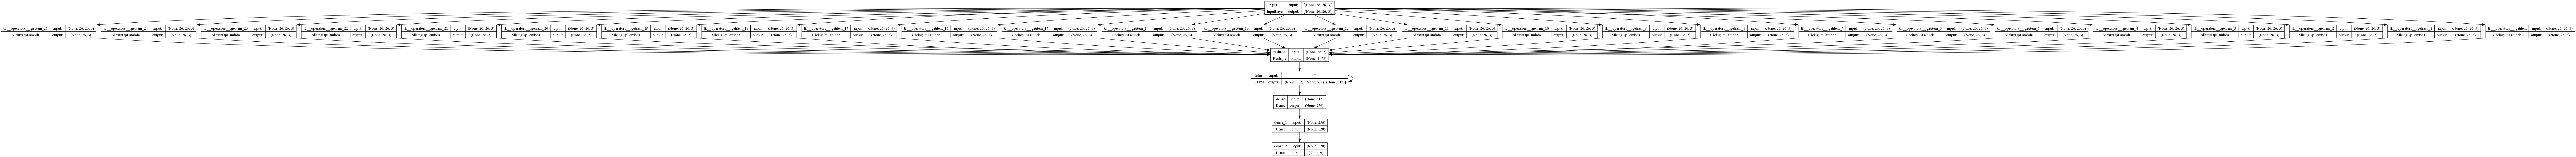

In [19]:
tf.keras.utils.plot_model(model,to_file="Softmax_LSTM_no_attention_model.png",show_shapes=True)

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.prev_loss=0
    def on_epoch_end(self,epoch,logs={}):
        model.save(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/LSTM NO-Attention models/model_{epoch}.h5")
        if(epoch>0 and logs.get('loss')>=self.prev_loss):
            print('\nLearning rate updated')
            self.model.optimizer.lr.assign(self.model.optimizer.lr.read_value()*0.1)
        self.prev_loss=logs.get('loss')

callbacks=myCallback()

In [9]:
history=model.fit(train_dataset,validation_data=test_dataset,batch_size=128,epochs=30,callbacks=[callbacks])

Epoch 1/30
141/141 [==============================] - 89s 233ms/step - loss: 1.4564 - accuracy: 0.6494 - val_loss: 1.1095 - val_accuracy: 0.8004
Epoch 2/30
141/141 [==============================] - 19s 131ms/step - loss: 0.7675 - accuracy: 0.7628 - val_loss: 0.6500 - val_accuracy: 0.9085
Epoch 3/30
141/141 [==============================] - 18s 128ms/step - loss: 0.4743 - accuracy: 0.8613 - val_loss: 0.3730 - val_accuracy: 0.9234
Epoch 4/30
141/141 [==============================] - 18s 128ms/step - loss: 0.3232 - accuracy: 0.9066 - val_loss: 0.2525 - val_accuracy: 0.9312
Epoch 5/30
141/141 [==============================] - 18s 130ms/step - loss: 0.2267 - accuracy: 0.9308 - val_loss: 0.1725 - val_accuracy: 0.9466
Epoch 6/30
141/141 [==============================] - 18s 129ms/step - loss: 0.1487 - accuracy: 0.9607 - val_loss: 0.1256 - val_accuracy: 0.9691
Epoch 7/30
141/141 [==============================] - 18s 128ms/step - loss: 0.1010 - accuracy: 0.9808 - val_loss: 0.0886 - val_ac

In [10]:
# Emergency Save
model.save(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/LSTM NO-Attention models/model_{30}.h5")

In [11]:
import json

with open(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/LSTM_NO-Attention.txt","w") as file:
    file.write(json.dumps(history.params))
with open(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/LSTM_NO-Attention_history.txt","w") as file:
    file.write(json.dumps(history.history))

In [8]:
model=tf.keras.models.load_model(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/LSTM NO-Attention models/model_{29}.h5")

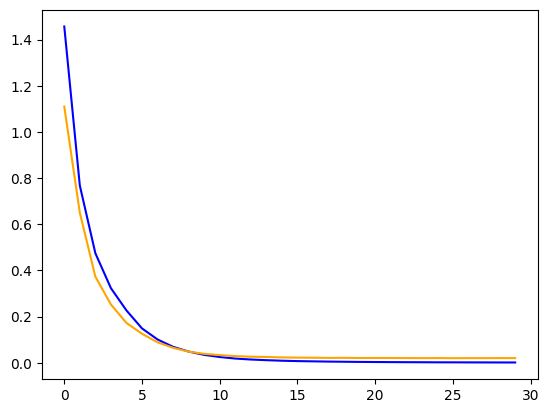

In [13]:
plt.plot(range(30),history.history["loss"],color="blue",label="Train Loss")
plt.plot(range(30),history.history["val_loss"],color="orange",label="Validation Loss")
plt.show()

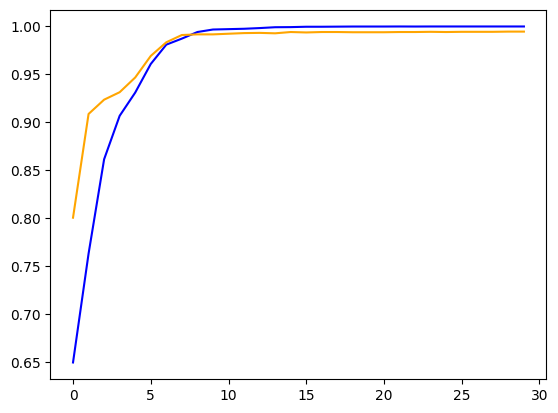

In [14]:
plt.plot(range(30),history.history["accuracy"],color="blue",label="Train Accuracy")
plt.plot(range(30),history.history["val_accuracy"],color="orange",label="Validation Accuracy")
plt.show()

In [9]:
model.evaluate(train_dataset)
model.evaluate(test_dataset)

36/36 [==============================] - 2s 59ms/step - loss: 0.0202 - accuracy: 0.9944


[0.020235516130924225, 0.9944357872009277]

In [10]:
Y_test=np.concatenate([y for x,y in test_dataset],axis=0)

In [11]:
y_predict=np.argmax(tf.nn.softmax(model.predict(test_dataset)),axis=1)

36/36 [==============================] - 16s 60ms/step


In [12]:
confusion_matrix=tf.math.confusion_matrix(Y_test,y_predict)
confusion_matrix

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[3073,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  384,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  384,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   59,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,   45,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,   31,   10,    0,    0],
       [   0,    0,    0,    0,    0,    0,   41,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  384,    0],
       [   2,    1,    0,    0,    0,    0,    8,    0,   67]])>

In [13]:
from mlxtend.plotting import plot_confusion_matrix

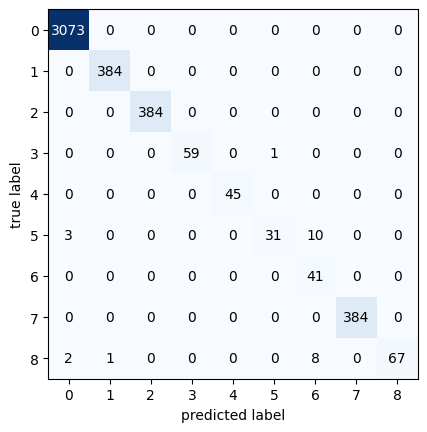

In [14]:
fig,ax=plot_confusion_matrix(confusion_matrix.numpy())
plt.show()